# CE282: Linear Algebra

## Final Project

Full Name: Mana Abbaszadeh

Student ID: 400109638


## Q1: Spectral Clustering (100 Points)

## Introduction
Spectral clustering is a clustering technique that uses the spectrum of the similarity matrix to perform dimensionality reduction before clustering in fewer dimensions. It is a powerful technique that can identify clusters of arbitrary shape and is robust to noise. It is also a popular technique for image segmentation. In this notebook, we will implement spectral clustering from scratch and apply it to graphs and kNN circles.

## Graph Implementation
In this section, we will implement a graph class that will be used to represent the similarity matrix. The graph class will have the following attributes and methods:
* **N**: the number of nodes in the graph
* **nodes**: the set of nodes in the graph
* **vertices**: the dict of edges of each node
* **add_node**: Add a node to the graph
* **connect**: Connect two nodes with an edge
* **disconnect**: Disconnect two nodes

In [37]:
class Graph:
    def __init__(self) -> None:
        self.N: int = 0
        self.nodes: set[int] = set()
        self.vertices: dict[int, set[int]] = dict()

    def add_node(self):
        self.nodes.add(self.N)
        self.vertices[self.N] = set()
        self.N = self.N + 1
    
    def connect(self, A: int, B: int):
        assert A < self.N
        assert A >= 0
        assert B < self.N
        assert B >= 0
        assert A != B
        self.vertices[A].add(B)
        self.vertices[B].add(A)

    def disconnect(self, A: int, B: int):
        assert A < self.N
        assert A >= 0
        assert B < self.N
        assert B >= 0
        assert A != B
        assert A in self.vertices[B]
        assert B in self.vertices[A]
        self.vertices[A].remove(B)
        self.vertices[B].remove(A)

## Constructing the Similarity Matrix
First we need to construct adjacency matrix.
Adjacency matrix is a matrix of size $N \times N$, where $N$ is the number of nodes in the graph. The entry $A_{ij} = 1$ if there is an edge connecting node $i$ and node $j$. If there is no edge connecting node $i$ and node $j$, then $A_{ij} = 0$.

In [38]:
import numpy as np

def adjacency_matrix(graph: Graph):
    num_of_nodes = graph.N
    ad_matrix = np.zeros((num_of_nodes, num_of_nodes), dtype=int)
    
    for i in range(num_of_nodes):
        for j in graph.vertices[i]:
            ad_matrix[i, j], ad_matrix[j, i]= 1, 1 

    return ad_matrix

Then we need to construct the degree matrix.
Degree matrix is a diagonal matrix of size $N \times N$, where $N$ is the number of nodes in the graph. The entry $D_{ii}$ is the degree of node $i$, i.e. the number of edges connected to node $i$. All other entries are 0.

In [39]:
def degree_matrix(graph: Graph):
    num_of_nodes = graph.N
    deg_matrix = np.zeros((num_of_nodes, num_of_nodes), dtype=int)

    for node in graph.nodes:
        deg_matrix[node - 1][node - 1] = len(graph.vertices[node])

    return deg_matrix

Finally, we can construct the laplacian matrix.
Laplacian matrix is a matrix of size $N \times N$, where $N$ is the number of nodes in the graph. There are many ways to define the laplacian between two nodes. In this notebook, we will use normal Laplacian similarity matrix, which is defined as:
\begin{equation}
S_{ij} = D_{ij} - A_{ij}
\end{equation}
where $D_{ij}$ is the degree matrix and $A_{ij}$ is the adjacency matrix.

In [40]:
def laplacian_matrix(graph: Graph):
    deg_matrix = degree_matrix(graph)
    adj_matrix = adjacency_matrix(graph)
    lap_matrix = deg_matrix - adj_matrix
    return lap_matrix

## Calculating Eigenvectors and Eigenvalues
After constructing the similarity matrix, we can calculate the eigenvectors and eigenvalues of the similarity matrix. We can then use the eigenvectors to perform dimensionality reduction. In this notebook, we will use the eigenvectors corresponding to the $k$ smallest eigenvalues, where $k$ is the number of clusters.

* Eigenvalues of laplacian matrix are always non-negative. Laplacian matrix is a positive semi-definite matrix.
* The first eigenvalue is always 0, and the corresponding eigenvector is the vector of all ones since the sum of each row of the laplacian matrix is 0.
* The second smallest eigenvalue is called the Fielder value (Algebraic connectivity). It is a measure of how well connected the graph is after removing the most poorly connected node. The Fielder value is often used to approximate sparsest cut of the graph. If the graph is connected, then the Fielder value is positive. If the graph is disconnected, then the Fielder value is 0. The number of times 0 appears as an eigenvalue is equal to the number of connected components in the graph.

In [41]:
def laplacian_values(graph: Graph, K: int):
    assert K > 0
    assert K < graph.N
    
    adj_matrix = adjacency_matrix(graph)
    degr_matrix = degree_matrix(graph)
    laplacian_matrix = degr_matrix - adj_matrix

    eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
    

    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = np.zeros_like(eigenvalues)
    sorted_eigenvectors = np.zeros_like(eigenvectors)

    for i in range(len(eigenvalues)):
        sorted_eigenvalues[i] = eigenvalues[sorted_indices[i]]
        sorted_eigenvectors[i] = eigenvectors[sorted_indices[i]]
    
    nonzero_indices = np.where(sorted_eigenvalues > 0)[0]
    k_smallest_eigenvalues = sorted_eigenvalues[nonzero_indices][:K]
    k_smallest_eigenvectors = []
    for i in range(len(nonzero_indices)):
        k_smallest_eigenvectors.append(sorted_eigenvectors[i])
    
    return k_smallest_eigenvalues, k_smallest_eigenvectors
    

## Plotting Eigenvalues

After becoming familiar with laplacian matrix, we can plot the eigenvalues of the laplacian matrix. The eigenvalues are plotted in ascending order. The x-axis is the index of the eigenvalue, and the y-axis is the value of the eigenvalue. The eigenvalues are plotted as a scatter plot.

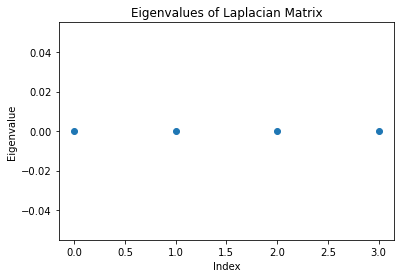

In [42]:
import matplotlib.pyplot as plt

g = Graph()
g.add_node()
g.add_node()
g.add_node()
g.add_node()

laplacian_res = laplacian_matrix(g)
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_res)

plt.scatter(range(len(eigenvalues)), eigenvalues)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Laplacian Matrix')
plt.show()

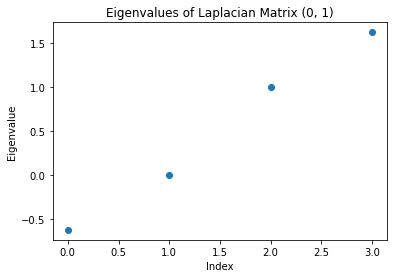

In [43]:
g.connect(0, 1)
laplacian_matrix_res = laplacian_matrix(g)
eigenvalues, _ = np.linalg.eigh(laplacian_matrix_res) 

plt.scatter(range(len(eigenvalues)), eigenvalues)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Laplacian Matrix (0, 1)')
plt.show()

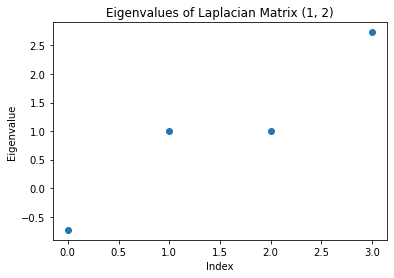

In [44]:
g.connect(1, 2)
laplacian_matrix_res = laplacian_matrix(g)
eigenvalues, _ = np.linalg.eigh(laplacian_matrix_res) 

plt.scatter(range(len(eigenvalues)), eigenvalues)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Laplacian Matrix (1, 2)')
plt.show()

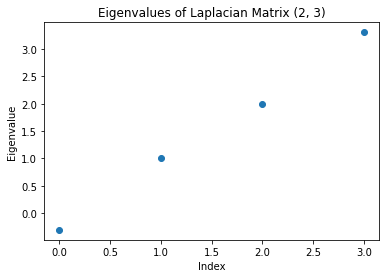

In [45]:
g.connect(2, 3)
laplacian_matrix_res = laplacian_matrix(g)
eigenvalues, _ = np.linalg.eigh(laplacian_matrix_res) 

plt.scatter(range(len(eigenvalues)), eigenvalues)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Laplacian Matrix (2, 3)')
plt.show()

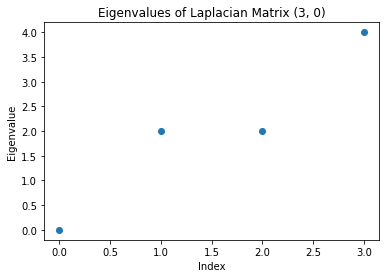

In [46]:
g.connect(3, 0)
laplacian_matrix_res = laplacian_matrix(g)
eigenvalues, _ = np.linalg.eigh(laplacian_matrix_res) 

plt.scatter(range(len(eigenvalues)), eigenvalues)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Laplacian Matrix (3, 0)')
plt.show()

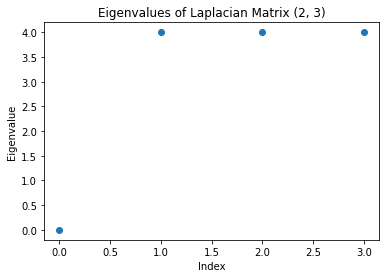

In [47]:
g.connect(0, 2)
g.connect(1, 3)
laplacian_matrix_res = laplacian_matrix(g)
eigenvalues, _ = np.linalg.eigh(laplacian_matrix_res) 

plt.scatter(range(len(eigenvalues)), eigenvalues)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Laplacian Matrix (2, 3)')
plt.show()

**Explain the meaning of the eigenvalues and describe the change in the eigenvalues as the edges were added to the graph here**:

با اضافه شدن یال ها به گراف، مقادیر ویژه با توجه به یال های اضافه شده و تاثیر آنها در گراف، تغییر می کنند. به عبارتی دیگر، بزرگی مقادیر ویژه با اتصال بیشتر یا جدا شدن گراف، می تواند تغییر کند. به عنوان نمونه می توان گفت که اگر بین ند هایی که به هم متصل هستند، یک یال اضافه کنیم، تغییر چندانی در گراف صورت نمی گیرد. به طور کلی، مقادیر ویژه در گراف، نشان دهنده یکسری از ویژگی های آن گراف هستند.

## Clustering Eigenvectors

Next we use KMeans to cluster the data points in the lower dimensional space. We can then assign each data point to the cluster with the nearest centroid. Finally, we can plot the data points and color them according to their cluster assignments. We can also plot the eigenvectors corresponding to the $k$ smallest eigenvalues. The eigenvectors can be viewed as the coordinates of the data points in the lower dimensional space. We can see that the eigenvectors corresponding to the $k$ smallest eigenvalues can separate the data points into $k$ clusters.

In [48]:
from sklearn.cluster import KMeans

def cluster(graph: Graph, N: int):
    assert N <= graph.N
    clusterer = KMeans(N)
    _, vecs = laplacian_values(graph, N)
    clusterer.fit(vecs)
    graph.clustered_nodes = dict([i, set()] for i in range(N))
    for N, label in enumerate(clusterer.labels_):
        graph.clustered_nodes[label].add(N)

In [49]:
import matplotlib.colors as mcolors
# import graphviz
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

def plot(graph: Graph):
    g = os.Graph()
    for cluster, color in zip(graph.clustered_nodes.keys(), mcolors.CSS4_COLORS.values()):
        with g.subgraph(name=f'C{cluster}') as gcl:
            for node in graph.clustered_nodes[cluster]:
                gcl.node(f'N{node}', style='filled', fillcolor=color)
    for A in graph.nodes:
        for B in graph.vertices[A]:
            if B > A:
                g.edge(f'N{A}', f'N{B}')
    g.view()

In [50]:
g = Graph()
g.add_node()
g.add_node()
g.connect(0, 1)
g.add_node()
g.connect(0, 2)
g.connect(1, 2)
g.add_node()
g.add_node()
g.connect(3, 4)
g.add_node()
g.connect(3, 5)
g.connect(4, 5)
g.add_node()
g.connect(5, 6)
g.add_node()
g.connect(5, 7)
g.connect(6, 7)
g.add_node()
g.connect(0, 8)
g.add_node()
g.connect(0, 9)
g.connect(8, 9)
g.connect(0, 5)
cluster(g, 3)
plot(g)

AttributeError: module 'os' has no attribute 'Graph'

## Cluster Circles

First we make the circles. We can use the make_circles function in sklearn.datasets to make two circles. We can then plot the circles. We can see that the circles are not linearly separable.

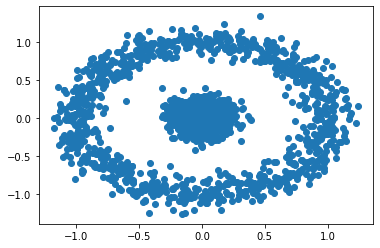

In [ ]:
from sklearn.datasets import make_circles

X, labels = make_circles(n_samples=2000, noise=.1, factor=.1)
plt.plot(X[:,0], X[:,1], 'o')
plt.show()

Now we construct adjacency matrix using kNN. We use kneighbors_graph function in sklearn.neighbors to construct the adjacency matrix. We can then construct the degree matrix and the laplacian matrix. We can then calculate the eigenvectors and eigenvalues of the laplacian matrix.

In [ ]:
from sklearn.neighbors import kneighbors_graph

adjacency_matrix = kneighbors_graph(X, n_neighbors=5).toarray()
# TODO: construct laplacian matrix
# TODO: calculate eigenvalues and eigenvectors of laplacian matrix and sort them in ascending order of eigenvalues
vals, vecs = None, None

Now let's cluster them using the Fielder value. We can see that the circles are separated into two clusters.

In [ ]:
clusters = vecs[:,1] > 0
plt.plot(X[clusters,0], X[clusters,1], 'o')
plt.plot(X[~clusters,0], X[~clusters,1], 'o')
plt.show()

TypeError: 'NoneType' object is not subscriptable